In [1]:
import numpy as np
from scipy.linalg import toeplitz
from sklearn import datasets
import matplotlib.pyplot as plt

### Applications of OLS

### Deconvolution
Back when the hubble telescope went up in space something was wrong with the image, and it got convolved. 
$$f(\text{image}) = \text{convolved image} + \epsilon_{noise}$$
Suppose it was your problem to find the inverse map 
$$\text{image} = f^{-1}(\text{convolved image} + \epsilon_{noise})$$

For the sake of simplicity lets unravel the images into a vector, and write this out as a system of equations
$$\text{convolved image vector (b)} = \text{convolution matrix (A)} * \text{image vector (x)} + \text{noise} (\epsilon)$$

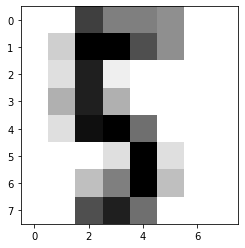

In [2]:
digits = datasets.load_digits()
image = digits['images'][25]
plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

In [5]:
flat_image = image.flatten()
N, m = len(flat_image), 5
convolution_matrix = 1/m * toeplitz([1]*m + [0]*(N-m), [1] + [0]*(N-1))
epsilon = np.random.normal(loc=0, scale=0.1, size=len(flat_image))

convolved_image = convolution_matrix @ flat_image + epsilon

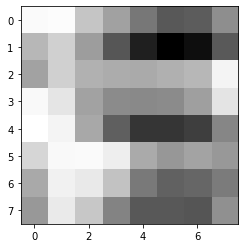

In [6]:
plt.imshow(convolved_image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')

#### Deconvolution Derivation

$$b = Ax + \epsilon$$
We will ignore the $\epsilon$ for now, and just solve this using OLS
$$A^Tb = A^TAX \implies (A^TA)^{-1}A^T b = X$$

In [10]:
from numpy.linalg import inv

In [8]:
def ols(A, b):
    return inv(A.T @ A) @ A.T @ b

reconstructed_image = ols(convolution_matrix, convolved_image)

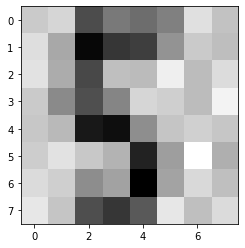

In [9]:
plt.imshow(reconstructed_image.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')